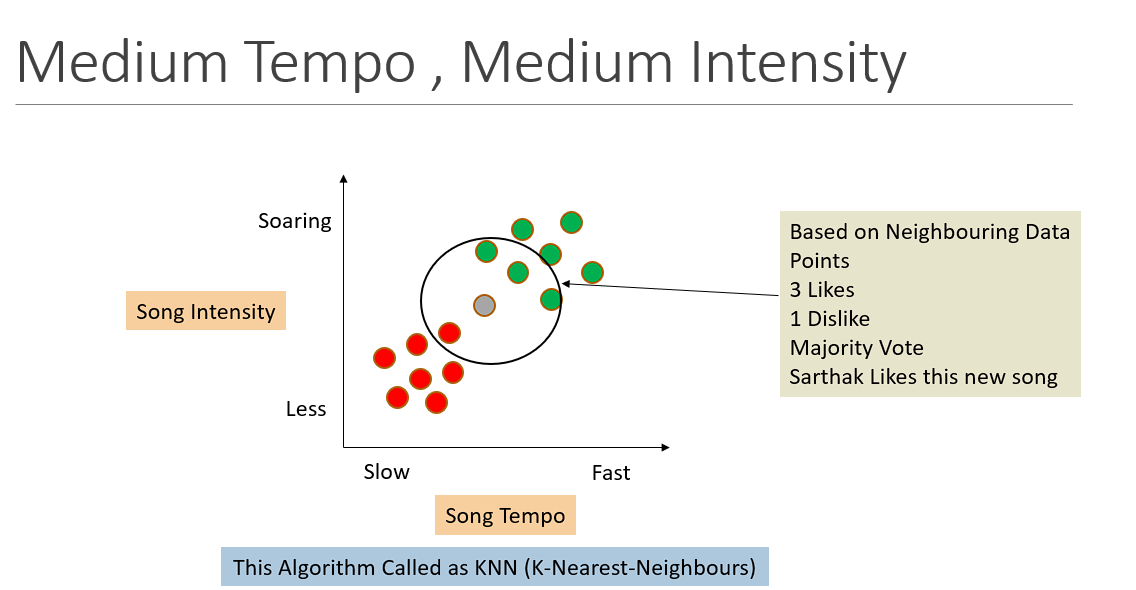

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1: Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.shape

(150, 5)

Step 3: Seperate X and Y(species)

In [7]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Step 4: Apply preprocessing pipeline on X

In [11]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('sclaer', StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Step 5: Apply train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [16]:
xtrain.shape

(100, 4)

In [17]:
xtest.shape

(50, 4)

Step 6: Create a KNN algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=31)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=31)

Model Evaluation KNN

In [19]:
model1.score(xtrain, ytrain)

0.87

In [20]:
model1.score(xtest, ytest)

0.88

Tune the KNN model

In [21]:
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9]}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv = RandomizedSearchCV(knn, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   scoring='f1_macro')

In [23]:
rscv.best_params_

{'n_neighbors': 3}

In [24]:
rscv.best_score_

0.9319552669552669

In [25]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [26]:
best_knn.score(xtrain, ytrain)

0.95

In [27]:
best_knn.score(xtest, ytest)

0.98

In [28]:
ypred_train1 = best_knn.predict(xtrain)
ypred_test1 = best_knn.predict(xtest)

In [29]:
ypred_train1[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [30]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [31]:
ypred_test1[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [32]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


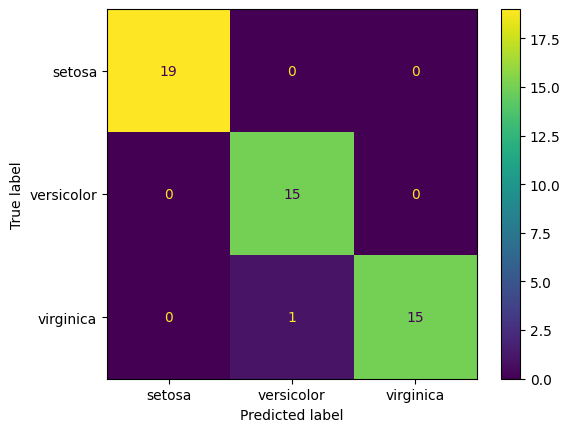

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

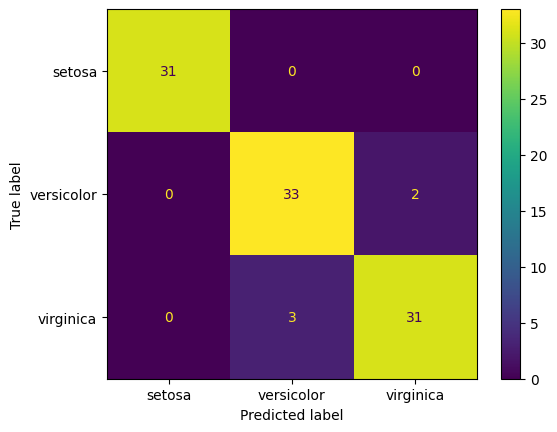

In [34]:
ConfusionMatrixDisplay.from_estimator(best_knn, xtrain, ytrain)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Building SVM

In [36]:
from sklearn.svm import SVC
model_svm = SVC(probability=True)
model_svm.fit(xtrain, ytrain)

SVC(probability=True)

In [37]:
model_svm.score(xtrain, ytrain)

0.97

In [38]:
model_svm.score(xtest, ytest)

0.98

In [39]:
from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(model_svm, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_svm

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [40]:
scores_svm.mean()

0.9319552669552669

In [41]:
scores_svm.mean()

0.9319552669552669

In [43]:
scores_knn = cross_val_score(best_knn, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_knn

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [44]:
scores_knn.mean()

0.9319552669552669

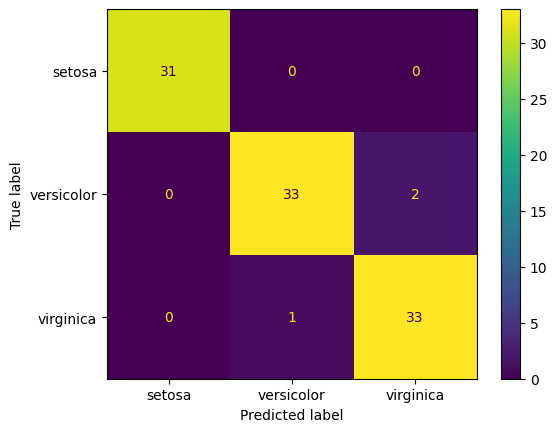

In [45]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtrain, ytrain)

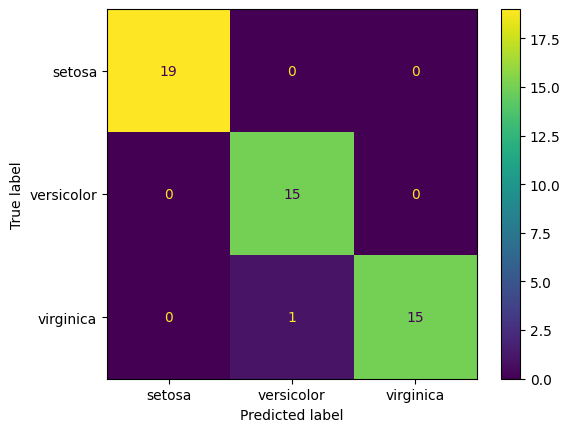

In [46]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtest, ytest)

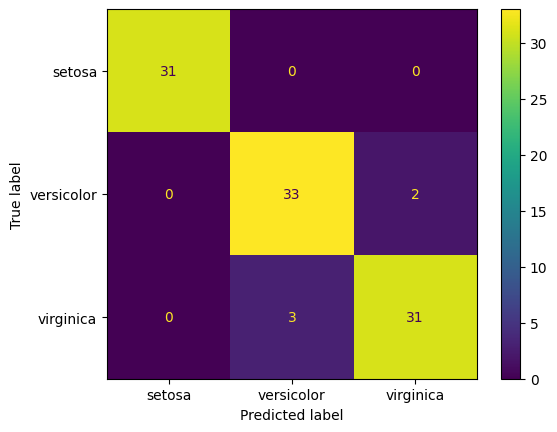

In [47]:
ConfusionMatrixDisplay.from_estimator(best_knn, xtrain, ytrain)

Select SVM from above because of Higher cross validation score of 0.9224

Step 8: Perform out of sample predictions

In [48]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [49]:
num_pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('sclaer', StandardScaler())])

In [50]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000
